In [170]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [171]:
#reading the file 
df=pd.read_csv("data.csv")

In [172]:
#Calculating the frequency of each class by using function value_counts()
df['y'].value_counts()

1    1560
0    1560
Name: TARGET_B, dtype: int64

In [173]:
#Calculating the Average denotion of people who denoted by storing only the
donations = df['y'] == 1
mean_denotions = df.loc[donations, 'd'].mean()
mean_denotions

12.99922435897436

In [175]:
#dropping all non useful columns
df=df.drop(['Row Id','Row Id.','d'],axis=1)


In [176]:
#selecting the number of features and target values and storing it in X,Y object
X=df.drop(['b'],axis=1)
Y=df['b']

In [177]:
#spliting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.40, random_state=42)

In [178]:
# these list will contain the accuracy,recall,precision and model name for each model
models=[]
Accuracy=[]
Precision=[]
Recall=[]
statistics=[]
def Confusion_matix_plot(model_name,y_pred):
    
    #plotting Confusion matrix plot
    cm=confusion_matrix(y_test, y_pred)
    statistics.append([cm[0][0]/len(y_pred)*100,cm[0][1]/len(y_pred)*100,cm[1][0]/len(y_pred)*100,cm[1][1]/len(y_pred)*100])
    ax = sn.heatmap(cm/np.sum(cm), annot=True, 
                fmt='.2%', cmap='Blues_r')
    ax.set_title(model_name+'  Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
    plt.show()


    #storing scores for comparison and appending to to nested list scores
    accuracy=round(accuracy_score(y_test,y_pred),3)
    Accuracy.append(accuracy)
    precision=round(precision_score(y_test,y_pred,average="macro"),3)
    Precision.append(precision)
    recall=round(recall_score(y_test,y_pred,average="macro"),3)
    Recall.append(recall)                
    models.append(model_name)
      

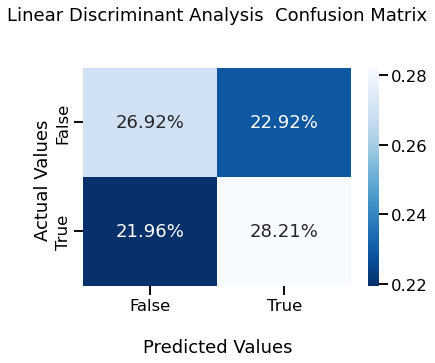

In [179]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
Confusion_matix_plot('Linear Discriminant Analysis',y_pred)


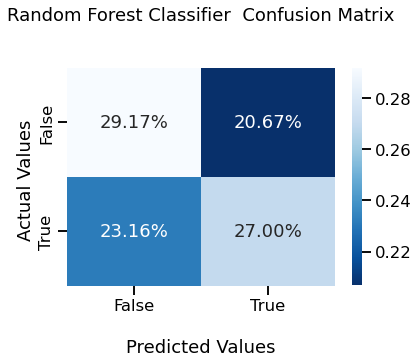

In [180]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
Confusion_matix_plot('Random Forest Classifier',prediction)


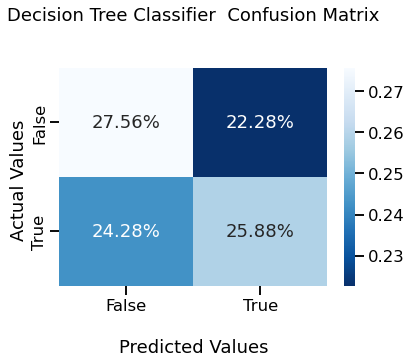

In [181]:
#DECISION TREE CLASSIFIER before hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  
model= DecisionTreeClassifier(random_state=0) 
model.fit(x_train,y_train)
prediction = model.predict(x_test)
Confusion_matix_plot('Decision Tree Classifier',prediction)


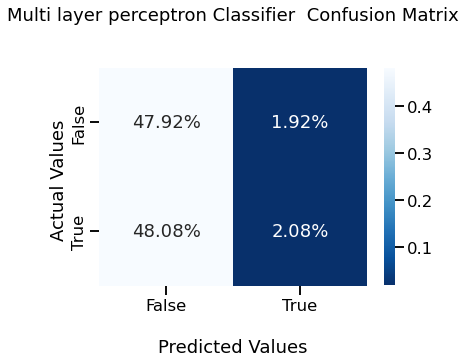

In [182]:
#Multi perceptron Classifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',hidden_layer_sizes=(5,), random_state=1,max_iter=500)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
Confusion_matix_plot('Multi layer perceptron Classifier',prediction)


C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


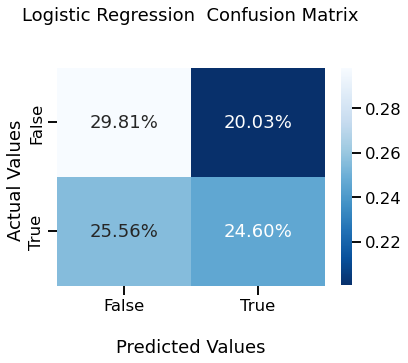

In [183]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
prediction=clf.predict(x_test)
Confusion_matix_plot('Logistic Regression',prediction)


In [184]:
print(models,Accuracy,Precision,Recall,statistics)

['Linear Discriminant Analysis', 'Random Forest Classifier', 'Decision Tree Classifier', 'Multi layer perceptron Classifier', 'Logistic Regression'] [0.551, 0.562, 0.534, 0.5, 0.544] [0.551, 0.562, 0.535, 0.51, 0.545] [0.551, 0.562, 0.535, 0.501, 0.544] [[26.923076923076923, 22.916666666666664, 21.955128205128204, 28.205128205128204], [29.166666666666668, 20.673076923076923, 23.157051282051285, 27.003205128205128], [27.564102564102566, 22.275641025641026, 24.278846153846153, 25.88141025641026], [47.91666666666667, 1.9230769230769231, 48.07692307692308, 2.083333333333333], [29.807692307692307, 20.032051282051285, 25.560897435897434, 24.599358974358974]]


In [185]:
#printing performances of all models in table.
d=[]
for i in range(0,len(models)):
    d.append([models[i],Accuracy[i],Precision[i],Recall[i],round(statistics[i][0],2),round(statistics[i][1],2),round(statistics[i][2],2),round(statistics[i][3],2)])
DF = pd.DataFrame(d, columns = ['models','accuracy','precision','recall','True Positive','False Positive','False Negative','True Negative'])
DF

,models,accuracy,precision,recall,True Positive,False Positive,False Negative,True Negative
0,Linear Discriminant Analysis,0.551,0.551,0.551,26.92,22.92,21.96,28.21
1,Random Forest Classifier,0.562,0.562,0.562,29.17,20.67,23.16,27.00
2,Decision Tree Classifier,0.534,0.535,0.535,27.56,22.28,24.28,25.88
3,Multi layer perceptron Classifier,0.500,0.510,0.501,47.92,1.92,48.08,2.08
4,Logistic Regression,0.544,0.545,0.544,29.81,20.03,25.56,24.60


From the above table, we can conclude that Random Forest performed best than the rest of the models in terms of accuracy,recall and precision.